In [1]:
!jt -t oceans16 -N -T -cellw 1200 -ofs 14 -dfs 12 -tfs 14 -tf code -nfs 14 -fs 14 -f hack

In [282]:
!jt -r

Reset css and font defaults in:
C:\Users\kuzne\.jupyter\custom &
C:\Users\kuzne\AppData\Roaming\jupyter\nbextensions


Signal amplification
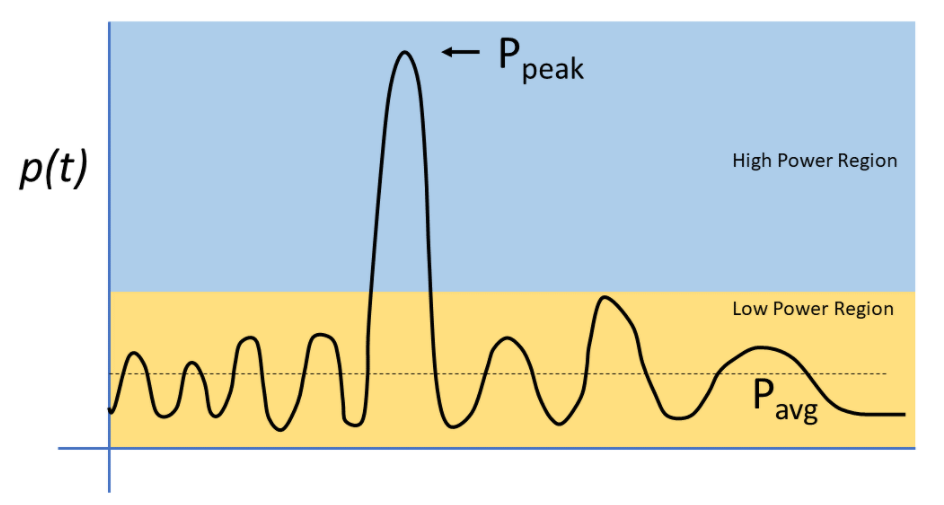

- B. E. Watkins, R. North and M. Tummala, "Neural network based adaptive predistortion for the linearization of nonlinear RF amplifiers", Proc. MILCOM, pp. 145-149, Nov. 1995.
- T. Liu, S. Boumaiza and F. M. Ghannouchi, "Dynamic behavioral modeling of 3G power amplifiers using real-valued time-delay neural networks", IEEE Trans. Microw. Theory Techn., vol. 52, no. 3, pp. 1025-1033, Mar. 2004.
- M. Rawat, K. Rawat and F. M. Ghannouchi, "Adaptive digital predistortion of wireless power amplifiers/transmitters using dynamic real-valued focused time-delay line neural networks", IEEE Trans. Microw. Theory Techn., vol. 58, no. 1, pp. 95-104, Jan. 2010.

Input layer:
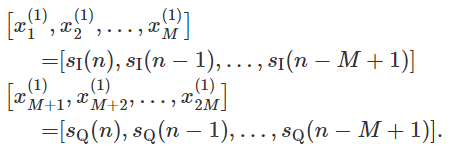

Hidden layers:
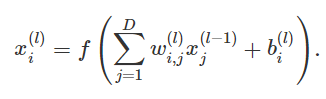

Output layer:
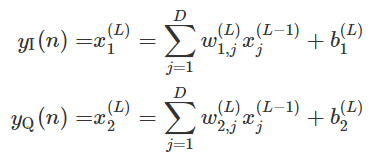

In [173]:
import pandas as pd

In [174]:
df = pd.read_csv('SOP.csv', delimiter='\t')
df

,x_real,x_imag,y_real,y_imag
0,0.0,0.0,1.038738,-4.530646
1,0.0,0.0,1.820132,-6.513940
2,0.0,0.0,1.729341,-1.936011
3,0.0,-0.0,1.851527,2.599776
4,0.0,-0.0,0.448547,6.800751
...,...,...,...,...
245755,-0.0,0.0,-5.496251,-7.106726
245756,-0.0,0.0,2.497821,1.009522
245757,-0.0,0.0,3.501016,6.063902
245758,-0.0,0.0,0.531160,1.366976


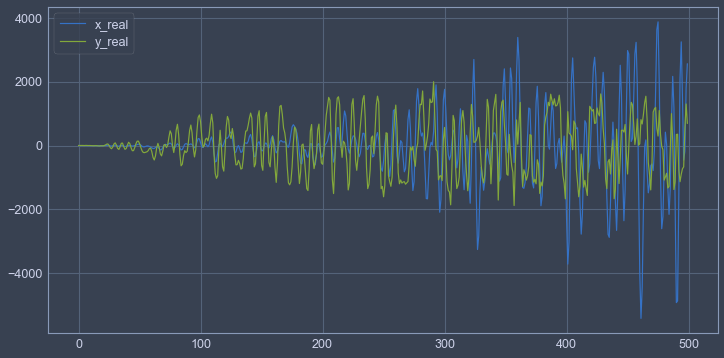

In [289]:
plt.plot(df.x_real[:500], label='x_real')
plt.plot(df.y_real[:500], label='y_real')
plt.legend();

In [175]:
df.describe()

,x_real,x_imag,y_real,y_imag
count,245760.000000,245760.000000,245760.000000,245760.000000
mean,0.005941,-0.007239,0.326069,-2.405308
std,5216.300247,5170.374673,1278.094777,1288.629409
min,-19135.000000,-19127.000000,-7956.600662,-8184.016771
25%,-3525.000000,-3496.000000,-731.032297,-736.804373
50%,1.000000,-2.000000,-0.043048,-0.088496
75%,3520.000000,3497.000000,732.448839,730.797447
max,19599.000000,19177.000000,7452.054802,7375.195878


In [176]:
df.corr()

,x_real,x_imag,y_real,y_imag
x_real,1.000000,-0.001733,0.118638,0.663647
x_imag,-0.001733,1.000000,-0.657381,0.111573
y_real,0.118638,-0.657381,1.000000,0.004954
y_imag,0.663647,0.111573,0.004954,1.000000


In [284]:
df.iloc[100:110, :]

,x_real,x_imag,y_real,y_imag
100,82.0,182.0,733.382436,244.160161
101,-44.0,120.0,264.156079,409.143404
102,-62.0,17.0,-50.702194,219.713299
103,11.0,-35.0,0.845572,-77.987027
104,58.0,14.0,197.166574,-66.922559
105,15.0,103.0,230.747570,267.508468
106,-39.0,131.0,145.535289,504.076440
107,21.0,80.0,324.361002,342.306596
108,185.0,44.0,693.306437,-95.002543
109,270.0,92.0,982.094993,-303.495963


In [181]:
df_np = df.to_numpy()
df_np

array([[ 0.        ,  0.        ,  1.03873787, -4.53064645],
       [ 0.        ,  0.        ,  1.82013213, -6.51394005],
       [ 0.        ,  0.        ,  1.72934089, -1.93601107],
       ...,
       [-0.        ,  0.        ,  3.50101648,  6.06390201],
       [-0.        ,  0.        ,  0.53116015,  1.36697645],
       [-0.        ,  0.        ,  3.33930177, -0.8654325 ]])

In [182]:
from sklearn.preprocessing import MinMaxScaler

In [183]:
scalerX, scalerY = MinMaxScaler(), MinMaxScaler()
X = scalerX.fit_transform(df_np[:, :2])
Y = scalerY.fit_transform(df_np[:, 2:])

In [184]:
X.shape, Y.shape

((245760, 2), (245760, 2))

In [185]:
X[:10, :]

array([[0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49401043, 0.49934733],
       [0.49403625, 0.49934733]])

In [186]:
Y[:10, :]

array([[0.51643957, 0.52570052],
       [0.51649028, 0.52557305],
       [0.51648439, 0.52586728],
       [0.51649232, 0.52615879],
       [0.51640127, 0.52642879],
       [0.51634513, 0.52632594],
       [0.5165893 , 0.52624054],
       [0.51636472, 0.52585947],
       [0.51631966, 0.52578413],
       [0.5164496 , 0.52631833]])

In [187]:
data_scaled = np.concatenate((X, Y), axis=1)
data_scaled.shape

(245760, 4)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
train, test = train_test_split(
    data_scaled,
    train_size=.75,
    shuffle=False,
)

In [190]:
train.shape, test.shape

((184320, 4), (61440, 4))

In [191]:
import numpy as np

In [192]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [193]:
from tensorflow.keras.optimizers import Adam

In [194]:
import matplotlib.pyplot as plt

In [222]:
# Convert an array of values into a dataset matrix.
def createDataset(dataset, lookBack):
	dataX, dataY = [], []
	for i in range(len(dataset) - lookBack - 1):
		a = dataset[i:(i + lookBack), :]
		dataX.append(a)
		dataY.append(dataset[i + lookBack, 2:])
	return np.array(dataX), np.array(dataY)


def runModel(train, test, lookBack=10, activation='relu', learningRate=1e-3):
    numFeatures = 4
    X_train, Y_train = createDataset(train, lookBack=lookBack)
    X_test, Y_test = createDataset(test, lookBack=lookBack)
    
    model = Sequential()
    model.add(layers.LSTM(lookBack, input_shape=(lookBack, numFeatures), activation=activation))
    model.add(layers.Dense(2))
    
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=learningRate),
        metrics=['accuracy'],
    )
    
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=5,
        verbose=1,
        shuffle=False,
    )
    
    Y_pred = model.predict(X_test)
    np.save(
        'grid_search_results\\' + f'look_back_{lookBack}_activation_{activation}_learning_rate_{learningRate}',
        Y_pred,
    )
    return Y_test, Y_pred
    
    
def mse(y1, y2):
    return np.linalg.norm(y1 - y2, 'fro')


def rmse(Y_true, Y_pred):
    return mse(Y_true, Y_pred) / mse(Y_true, np.mean(Y_true) * np.ones_like(Y_true))


def optimalParams(errs, gridParams):
    indmin = np.unravel_index(errs.argmin(), errs.shape)
    bestErr = errs[indmin]
    return {
        'lookBack': list(gridParams['lookBack'])[indmin[0]],
        'activation': list(gridParams['activation'])[indmin[1]],
        'learningRate': list(gridParams['learningRate'])[indmin[2]],
    }, bestErr


def gridSearch(gridParams, train, test):
    errs = []
    for lookBack in gridParams['lookBack']:
        for activation in gridParams['activation']:
            for learningRate in gridParams['learningRate']:
                Y_test, Y_pred = runModel(train, test, lookBack, activation, learningRate)
                err = rmse(Y_test, Y_pred)
                errs.append(err)
    errs = np.array(errs).reshape((
        len(gridParams['lookBack']),
        len(gridParams['activation']),
        len(gridParams['learningRate']),
    ))
    
    return *optimalParams(), errs

In [172]:
optimalParams, bestErr, errs = gridSearch({
    'lookBack': np.arange(3, 100, 5),
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learningRate': [1e-3, 1e-2, 1e-1],
}, train, test)

Epoch 1/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0108 - accuracy: 0.5456
Epoch 2/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0049 - accuracy: 0.5906
Epoch 3/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0038 - accuracy: 0.6587
Epoch 4/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0031 - accuracy: 0.7048
Epoch 5/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.7258
Epoch 1/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0060 - accuracy: 0.5779
Epoch 2/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0049 - accuracy: 0.5891
Epoch 3/5
5760/5760 [==============================] - 6s 1ms/step - loss: 0.0049 - accuracy: 0.5876
Epoch 4/5
5760/5760 [==============================] - 7s 1ms/step - loss: 0.0049 - accuracy: 0.5834: 0s - loss: 0.0049 - accu
Epoch 5/5
5760/5760 [==============================] - 7s 1ms/ste

5760/5760 [==============================] - 31s 5ms/step - loss: 0.0030 - accuracy: 0.7428
Epoch 2/5
5760/5760 [==============================] - 29s 5ms/step - loss: 0.0033 - accuracy: 0.6992
Epoch 3/5
5760/5760 [==============================] - 29s 5ms/step - loss: 0.0030 - accuracy: 0.7263
Epoch 4/5
5760/5760 [==============================] - 29s 5ms/step - loss: 0.0031 - accuracy: 0.7241
Epoch 5/5
5760/5760 [==============================] - 29s 5ms/step - loss: 0.0031 - accuracy: 0.7370
Epoch 1/5
5760/5760 [==============================] - 25s 4ms/step - loss: 0.0048 - accuracy: 0.6554
Epoch 2/5
5760/5760 [==============================] - 25s 4ms/step - loss: 0.0026 - accuracy: 0.7446
Epoch 3/5
5760/5760 [==============================] - 24s 4ms/step - loss: 0.0019 - accuracy: 0.7836
Epoch 4/5
5760/5760 [==============================] - 24s 4ms/step - loss: 0.0017 - accuracy: 0.7974
Epoch 5/5
5760/5760 [==============================] - 24s 4ms/step - loss: 0.0015 - accurac

5760/5760 [==============================] - 43s 7ms/step - loss: 0.0046 - accuracy: 0.7184
Epoch 2/5
5760/5760 [==============================] - 41s 7ms/step - loss: 0.0011 - accuracy: 0.8383
Epoch 3/5
5760/5760 [==============================] - 41s 7ms/step - loss: 8.9557e-04 - accuracy: 0.8529
Epoch 4/5
5760/5760 [==============================] - 42s 7ms/step - loss: 8.6172e-04 - accuracy: 0.8561
Epoch 5/5
5760/5760 [==============================] - 42s 7ms/step - loss: 8.4398e-04 - accuracy: 0.8581
Epoch 1/5
5760/5760 [==============================] - 44s 7ms/step - loss: 0.0018 - accuracy: 0.8054
Epoch 2/5
5760/5760 [==============================] - 42s 7ms/step - loss: 0.0010 - accuracy: 0.8440
Epoch 3/5
5760/5760 [==============================] - 43s 7ms/step - loss: 9.7320e-04 - accuracy: 0.8473
Epoch 4/5
5760/5760 [==============================] - 42s 7ms/step - loss: 9.3167e-04 - accuracy: 0.8500
Epoch 5/5
5760/5760 [==============================] - 42s 7ms/step - lo

KeyboardInterrupt: 

In [218]:
gridParams = {
    'lookBack': np.arange(3, 40, 5),
    'activation': ['relu', 'tanh', 'sigmoid'],
    'learningRate': [1e-3, 1e-2, 1e-1],
}
errs = []
for lookBack in gridParams['lookBack']:
    for activation in gridParams['activation']:
        for learningRate in gridParams['learningRate']:
            _, Y_test = createDataset(test, lookBack=lookBack)
            Y_pred = np.load(
                'grid_search_results\\' + f'look_back_{lookBack}_activation_{activation}_learning_rate_{learningRate}.npy'
            )
            err = rmse(Y_test, Y_pred)
            errs.append(err)
errs = np.array(errs).reshape((
    len(gridParams['lookBack']),
    len(gridParams['activation']),
    len(gridParams['learningRate']),
))

In [226]:
errs

array([[[0.6414269 , 0.83603474, 0.85826896],
        [0.62607609, 0.63024976, 0.63787453],
        [0.63879832, 0.64057386, 0.65165237]],

       [[0.51196927, 0.55213708, 1.01947071],
        [0.51120873, 0.51703726, 0.53209992],
        [0.53684744, 0.53839308, 0.59609721]],

       [[0.45262104, 0.48162762, 1.00781651],
        [0.4515218 , 0.44993459, 0.58011941],
        [0.47501522, 0.46524087, 0.63843059]],

       [[0.40681028, 0.41532148, 0.86891362],
        [0.39862751, 0.40349585, 0.65236153],
        [0.43636565, 0.41282277, 0.71989363]],

       [[0.36959019, 0.44483344, 0.58547245],
        [0.37299922, 0.38219771, 0.84569208],
        [0.43502095, 0.41048232, 0.80821859]],

       [[0.36333964, 0.38886573, 0.98191604],
        [0.35115707, 0.35059232, 0.88705153],
        [0.42260604, 0.39652337, 0.66386524]],

       [[0.33520708, 0.3468475 ,        nan],
        [0.33877559, 0.3384003 , 0.61274334],
        [0.38368197, 0.35446079, 0.6780404 ]],

       [[0.33547904,

In [229]:
errs[np.isnan(errs)] = 1.
errs

array([[[0.6414269 , 0.83603474, 0.85826896],
        [0.62607609, 0.63024976, 0.63787453],
        [0.63879832, 0.64057386, 0.65165237]],

       [[0.51196927, 0.55213708, 1.01947071],
        [0.51120873, 0.51703726, 0.53209992],
        [0.53684744, 0.53839308, 0.59609721]],

       [[0.45262104, 0.48162762, 1.00781651],
        [0.4515218 , 0.44993459, 0.58011941],
        [0.47501522, 0.46524087, 0.63843059]],

       [[0.40681028, 0.41532148, 0.86891362],
        [0.39862751, 0.40349585, 0.65236153],
        [0.43636565, 0.41282277, 0.71989363]],

       [[0.36959019, 0.44483344, 0.58547245],
        [0.37299922, 0.38219771, 0.84569208],
        [0.43502095, 0.41048232, 0.80821859]],

       [[0.36333964, 0.38886573, 0.98191604],
        [0.35115707, 0.35059232, 0.88705153],
        [0.42260604, 0.39652337, 0.66386524]],

       [[0.33520708, 0.3468475 , 1.        ],
        [0.33877559, 0.3384003 , 0.61274334],
        [0.38368197, 0.35446079, 0.6780404 ]],

       [[0.33547904,

In [219]:
errs.shape

(8, 3, 3)

In [230]:
bestParams, bestErr = optimalParams(errs, gridParams)

In [231]:
bestParams

{'lookBack': 38, 'activation': 'tanh', 'learningRate': 0.001}

In [247]:
bestErr, errs.mean(), errs.max()

(0.3241416533103591, 0.5560737886800533, 1.0365262373786537)

In [233]:
Y_test, Y_pred = runModel(train, test, **bestParams)

Epoch 1/5
5759/5759 [==============================] - 66s 11ms/step - loss: 0.0025 - accuracy: 0.7749
Epoch 2/5
5759/5759 [==============================] - 66s 11ms/step - loss: 9.1548e-04 - accuracy: 0.8538
Epoch 3/5
5759/5759 [==============================] - 65s 11ms/step - loss: 8.2328e-04 - accuracy: 0.8619
Epoch 4/5
5759/5759 [==============================] - 65s 11ms/step - loss: 7.7972e-04 - accuracy: 0.8654
Epoch 5/5
5759/5759 [==============================] - 65s 11ms/step - loss: 7.5123e-04 - accuracy: 0.8673


In [234]:
rmse(Y_test, Y_pred)

0.3284646982588869

In [237]:
from jupyterthemes import jtplot

In [238]:
jtplot.style()

In [260]:
plt.rcParams['figure.figsize'] = 12, 6

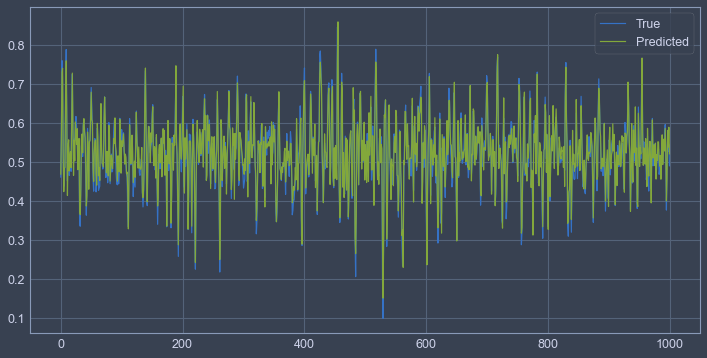

In [291]:
plt.plot(Y_test[:1000, 0], label='True')
plt.plot(Y_pred[:1000, 0], label='Predicted')
plt.legend();

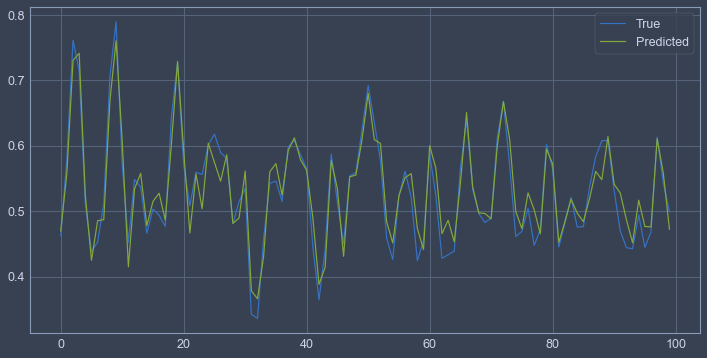

In [292]:
plt.plot(Y_test[:100, 0], label='True')
plt.plot(Y_pred[:100, 0], label='Predicted')
plt.legend();

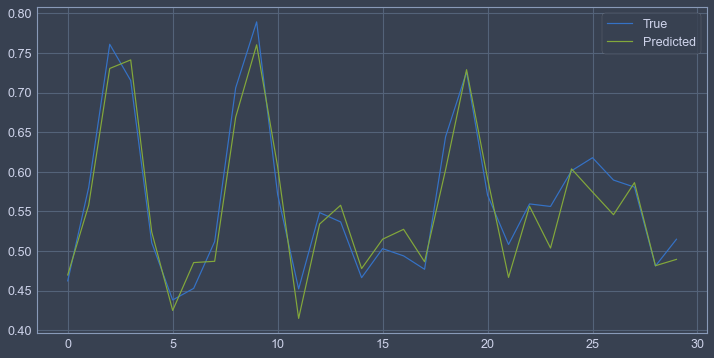

In [293]:
plt.plot(Y_test[:30, 0], label='True')
plt.plot(Y_pred[:30, 0], label='Predicted')
plt.legend();

Optimal look back value from the simulations: 38


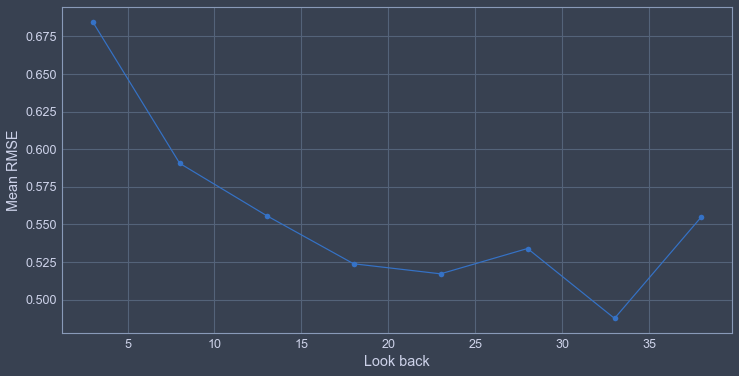

In [268]:
# RMSE vs. look back.
plt.plot(gridParams['lookBack'], errs.mean(axis=(1, 2)), 'o-')
plt.xlabel('Look back')
plt.ylabel('Mean RMSE')
print(f'Optimal look back value from the simulations: {bestParams["lookBack"]}')

Optimal learning rate value from the simulations: 0.001


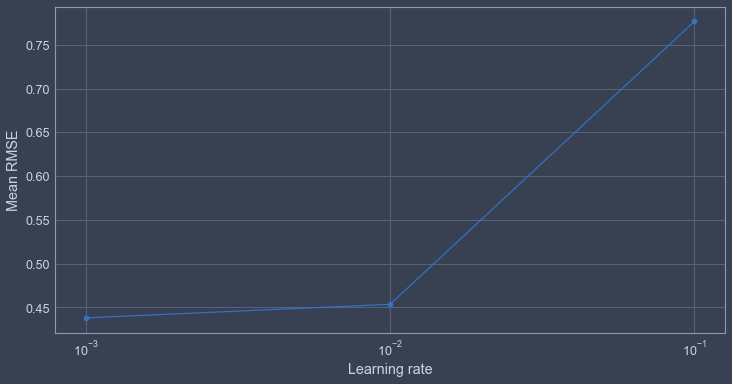

In [270]:
# RMSE vs. learning rate.
plt.semilogx(gridParams['learningRate'], errs.mean(axis=(0, 1)), 'o-')
plt.xlabel('Learning rate')
plt.ylabel('Mean RMSE')
print(f'Optimal learning rate value from the simulations: {bestParams["learningRate"]}')

In [271]:
import seaborn as sns

Optimal activation function from the simulations: tanh


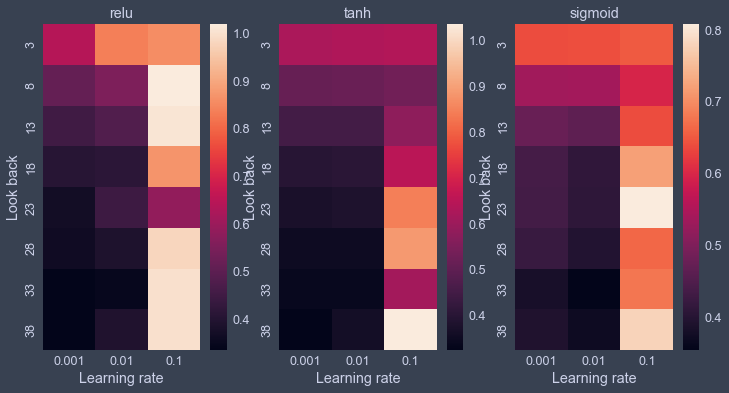

In [277]:
# RMSE vs. activation.
for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(
        errs[:, i, :],
        xticklabels=gridParams['learningRate'],
        yticklabels=gridParams['lookBack'],
    )
    plt.xlabel('Learning rate')
    plt.ylabel('Look back')
    plt.title(gridParams['activation'][i])
print(f'Optimal activation function from the simulations: {bestParams["activation"]}')

In [278]:
bestParams

{'lookBack': 38, 'activation': 'tanh', 'learningRate': 0.001}

In [279]:
bestErr

0.3241416533103591